# Mode - most frequent values(Categorical Data)
# Mean/Median - avg and middle (Numerical Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("train_housing.csv",usecols=["GarageQual","FireplaceQu","SalePrice"])

In [6]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [10]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [12]:
df["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [14]:
df["GarageQual"].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [15]:
df["GarageQual"].nunique()

5

In [30]:
df["FireplaceQu"].mode()

0    Gd
dtype: object

<AxesSubplot:>

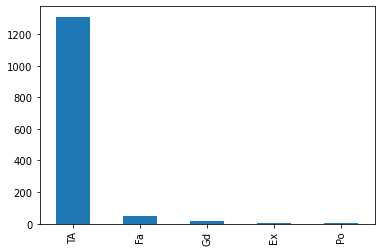

In [18]:
df["GarageQual"].value_counts().plot(kind="bar")

In [19]:
df["GarageQual"].mode()

0    TA
dtype: object

# From sklearn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [31]:
tnf = ColumnTransformer(transformers=[
    ("impute1",SimpleImputer(strategy="most_frequent"),["FireplaceQu"]),
    ("impute2",SimpleImputer(strategy="most_frequent"),["GarageQual"])
],remainder="passthrough")

In [32]:
X_train_new = tnf.fit_transform(X_train)
X_test_new = tnf.transform(X_test)

In [50]:
X_train_new1 = pd.DataFrame(X_train_new,columns=X_train.columns)
X_test_new1 = pd.DataFrame(X_test_new,columns=X_test.columns)

# Replace with NAN values with fixed values (Missing)
## ---------------------------------------------------------------------------------------

In [52]:
tnf = ColumnTransformer(transformers=[
    ("impute1",SimpleImputer(strategy="constant",fill_value="Missing"),["FireplaceQu"]),
    ("impute1",SimpleImputer(strategy="constant",fill_value="Missing"),["GarageQual"]),
    
],remainder="passthrough")